### INTRODUCTION

- Nama : Gede Aldi
- Batch : RMT-29
- Objective yang ingin dicapai adalah  untuk mengetahui:
1. Bagaimanakah bentuk kata-kata dalam label emosi tertentu tertentu

2. Apakah transfer learning membuat model NLP menjadi lebih baik?

3. Bagaimanakah performa NLP jika menggunakan transfer learning dan juga Embedding normal

### IMPORT LIBRARIES

In [61]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!pip install pysastrawi
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r'/content/text.csv')
df

Unnamed: 0                                               text  label
0                0      i just feel really helpless and heavy hearted    4.0
1                1  ive enjoyed being able to slouch about relax a...    0.0
2                2  i gave up my internship with the dmrg and am f...    4.0
3                3                         i dont know i feel so lost    0.0
4                4  i am a kindergarten teacher and i am thoroughl...    4.0
...            ...                                                ...    ...
107740      107740  i feel like i m the only person who s not ente...    1.0
107741      107741                          i feel sooooooo lethargic    0.0
107742      107742  i probably could add a lot more to this list b...    0.0
107743      107743  im feeling in love w my beloved mate this morning    1.0
107744      107744                                                NaN    NaN

[107745 rows x 3 columns]

Dataset yang digunakan adalah sebuah kumpulan pesan Twitter dalam bahasa Inggris yang disertai dengan enam emosi fundamental: kemarahan, ketakutan, kegembiraan, cinta, kesedihan, dan kejutan. Setiap entri dalam dataset ini terdiri dari segmen teks yang mewakili sebuah pesan Twitter dan label yang sesuai menunjukkan emosi utama yang disampaikan. Emosi-emosi tersebut diklasifikasikan ke dalam enam kategori: kesedihan (0), kegembiraan (1), cinta (2), kemarahan (3), ketakutan (4), dan kejutan (5).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107745 entries, 0 to 107744
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  107745 non-null  int64  
 1   text        107744 non-null  object 
 2   label       107744 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


Dari hasil eksplorasi data sederhana didapat bahwa kolom text dan label mempunyai satu missing value sehingga akan dilakukan handling berupa drop baris yang mengandung data kosong tersebut

In [4]:
df.dropna(axis=0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107744 entries, 0 to 107743
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  107744 non-null  int64  
 1   text        107744 non-null  object 
 2   label       107744 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [6]:
print('Jumlah Duplikat:',df.duplicated().sum()) # menampilkan jumlah duplikat

Jumlah Duplikat: 0


Setelah dilakukan drop data maka dilihat apakah ada data memiliki duplikat. Setelah dilihat ternyata tidak ada data yang memiliki duplikat sehingga akan dilakukan visualisasi untuk melihat karakteristik umum dari data

### EDA

In [7]:
## WORDCLOUD

text = df.text.values
wordcloud= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("All Word")
plt.imshow(wordcloud)

 Pertama-tama akan dilakukan visualisasi berupa word cloud di mana visualisasi ini berupa kata-kata apa saja yang ada pada kalimat dalam tweet. Terlihat ada beberapa kata yang sangat aneh dari wordcloud yang  dibuat seperti : ve, t, href, m. Lalu selanjutnya akan dilakukan visualisasi untuk kata-kata dalam kalimat-kalimat di label-label tertentu seperti kata-kata pada label sedih atau kata-kata pada label marah dan lain-lain

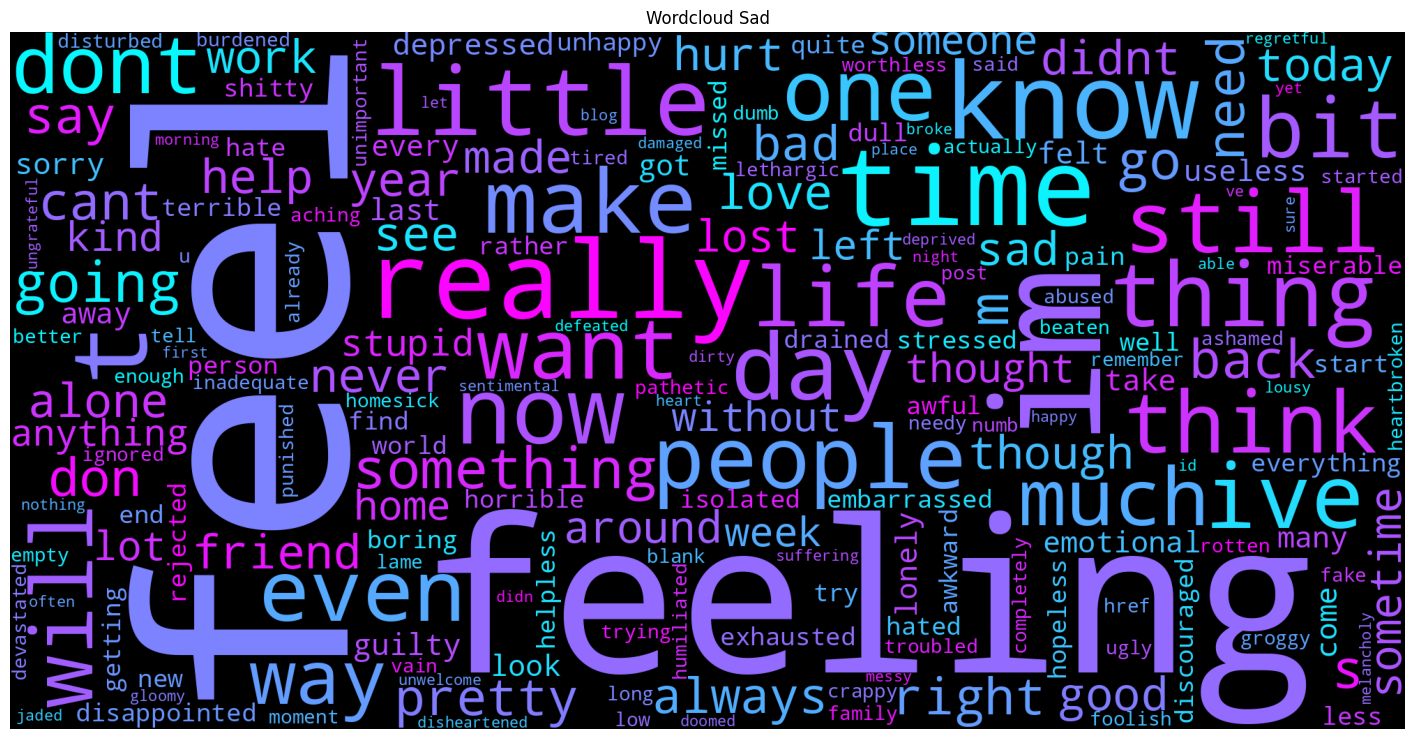

In [72]:
### Wordcloud Sad
text_sad = df[df['label']==0].text.values
wordcloud_sad= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_sad))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud Sad")
plt.imshow(wordcloud_sad)


Dari visualisasi data yang mengandung kata-kata yang sedih terdapat beberapa kata tidak memiliki arti seperti m, u, ve, s, href.

In [73]:
# Wordcloud Joy
text_joy = df[df['label']==1].text.values
wordcloud_joy= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_joy))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud Joy")
plt.imshow(wordcloud_joy)

 Untuk visualisasi data dengan kata-kata yang mengandung makna senang juga terdapat beberapa kata dan huruf aneh seperti: s, m, u,

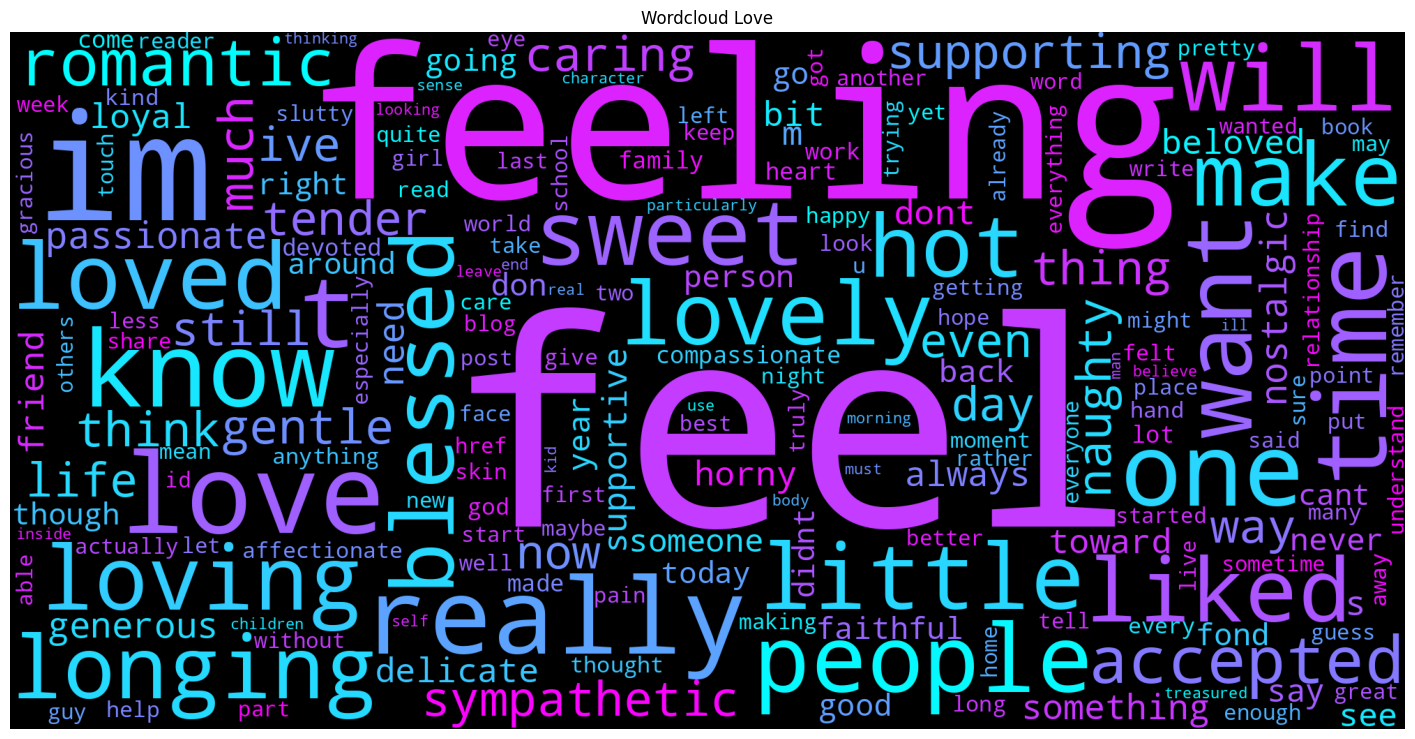

In [74]:
# Wordcloud Love
text_love = df[df['label']==2].text.values
wordcloud_love= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_love))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud Love")
plt.imshow(wordcloud_love)

Untuk beberapa kata-kata yang mengandung makna cinta juga terdapat huruf dan kata yang aneh seperti S, href

In [75]:
# Wordcloud Anger
text_anger = df[df['label']==3].text.values
wordcloud_anger= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_anger))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud anger")
plt.imshow(wordcloud_anger)

Di kata-kata yang mengandung makna marah juga terdapat beberapa kata dan huruf yang aneh seperti ve, id

In [76]:
# Wordcloud Fear
text_fear = df[df['label']==4].text.values
wordcloud_fear= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_fear))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud fear")
plt.imshow(wordcloud_fear)

 Di dalam kata-kata yang mengandung ketakutan juga terdapat beberapa huruf dan kata yang aneh seperti m, alway, u, ve, s

In [77]:
# Wordcloud Surprise
text_surprise = df[df['label']==5].text.values
wordcloud_surprise= WordCloud(background_color='black',colormap='cool',collocations=False, width=2000,height=1000).generate(" ".join(text_surprise))

plt.figure(figsize=(18,12))
plt.axis('off')
plt.title("Wordcloud Surprise")
plt.imshow(wordcloud_surprise)

Setelah dilakukan visualisasi untuk kata-kata yang mengandung makna terkejut juga ada beberapa kata dan huruf yang masih aneh seperti m, href, s. Dan karena dilihat dari seluruh wordcloud yang dibuat terdapat huruf-huruf yang sama seperti m, s, dan href maka akan dilakukan eksplorasi. Setelah dilakukan eksplorasi di internet terlihat bahwa href merupakan salah satu bentuk url maka saat text preprocessing akan dihilangkan

### TEXT PREPROCESSING

In [20]:
stpwds_en = list(set(stopwords.words('english')))
stpwds_en.append('oh') # Cara lain dari "stpwds_id = stpwds_id + ['oh']"

lemmatizer = WordNetLemmatizer()

Untuk text preprocessing dilakukan tahapan pertama yaitu membuat stopwords. Dimana stopwords adalah kata-kata umum yang sering muncul dalam teks dan umumnya diabaikan karena kurangnya nilai informatif dalam analisis teks. Kata-kata ini tidak memberikan kontribusi banyak terhadap makna atau topik dari sebuah dokumen dan sering kali dihapus dari teks saat preprocessing. Contoh stopwords dalam bahasa Inggris meliputi kata-kata seperti "the", "is", "at", "which". Dan dilakukan juga define lemmatizer yang nantinya akan digunakan di fungsi yang dibuat

In [21]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)
  text = re.sub(r"\bhref\b", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Numerical Removing
  text = re.sub(r'\d+', '', text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_en]

  # Lemmatization
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

Untuk tahapan kedua dibuat sebuah fungsi untuk menangani huruf kapital, mention pada text, hashtag pada text, newline pada text, whitespace pada text, URL berupa www/ http/bhref pada text, penghilangan simbol seperti μ, $, 兀 lalu penghilangan angka pada teks. lalu dilanjutkan tokenisasi yang mengonversi teks atau dokumen menjadi unit-unit yang lebih kecil, yang disebut sebagai token. lalu setelah tokenisasi ini lah juga dilakukan penghilangan stopwords dan juga lemmatisasi yang merupakan proses normalisasi teks dalam pemrosesan bahasa alami yang bertujuan untuk mengonversi kata-kata ke bentuk dasarnya atau kata dasar. Begitulah kurang lebih bagaimana kolom text akan diolah menggunakan fungsi diatas

In [22]:
df['text_processed'] = df['text'].apply(lambda x: text_preprocessing(x))
df

Unnamed: 0                                               text  label  \
0                0      i just feel really helpless and heavy hearted    4.0   
1                1  ive enjoyed being able to slouch about relax a...    0.0   
2                2  i gave up my internship with the dmrg and am f...    4.0   
3                3                         i dont know i feel so lost    0.0   
4                4  i am a kindergarten teacher and i am thoroughl...    4.0   
...            ...                                                ...    ...   
107739      107739  im feeling generous you might get to read some...    2.0   
107740      107740  i feel like i m the only person who s not ente...    1.0   
107741      107741                          i feel sooooooo lethargic    0.0   
107742      107742  i probably could add a lot more to this list b...    0.0   
107743      107743  im feeling in love w my beloved mate this morning    1.0   

                                           text_processed  
0                      feel really helpless heavy hearted  
1       ive enjoyed able slouch relax unwind frankly n...  
2                 gave internship dmrg feeling distraught  
3                                     dont know feel lost  
4       kindergarten teacher thoroughly weary job take...  
...                                                   ...  
107739         im feeling generous might get read excerpt  
107740  feel like person entertained manufactured conf...  
107741                            feel sooooooo lethargic  
107742  probably could add lot list would make feel mi...  
107743             im feeling love w beloved mate morning  

[107744 rows x 4 columns]

Setelah itu dibuat sebuah kolom baru di mana kolam ini sudah terdapat kata-kata atau kalimat yang sudah dibersihkan

In [23]:
df[df['text_processed'].str.contains('href')]

Empty DataFrame
Columns: [Unnamed: 0, text, label, text_processed]
Index: []

Lalu kita test dan cari apakah masih terdapat kata yang aneh seperti href pada kolom baru yang sudah bersih. Dan ternyata sudah tidak ada sehingga tahapan pre processing sudah selesai dan akan dilanjutkan untuk membuat modelnya

### MODEL BUILDING

In [48]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.text_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (82423,)
Val Size   :  (9159,)
Test Size  :  (16162,)


In [49]:
y_train.shape

(82423,)

In [50]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

Pembuatan model diawali dengan melakukan split data menjadi 3 yaitu data latihan, data validasi, dan juga data set uji. Lalu dilanjutkan dengan melakukan encoding menggunakan onehot encoder untuk label agar memiliki dimensi 6

#### TEXT VECTORIZATION

In [51]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<82423x31042 sparse matrix of type '<class 'numpy.int64'>'
	with 741872 stored elements in Compressed Sparse Row format>

In [52]:
totalvocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', totalvocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  31042
Maximum Sentence Length :  48 tokens


In [53]:
text_vectorization = TextVectorization(max_tokens=totalvocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

Langkah selanjutnya digunakan CountVectorizer untuk mengonversi kumpulan dokumen teks menjadi matriks di mana setiap baris mewakili satu dokumen, dan setiap kolom mewakili kata dalam seluruh kumpulan text. Nilai di dalam matriks menunjukkan berapa kali kata tersebut muncul dalam text yang kita miliki. Sehingga didapatkan berapa total vocab dan juga maximul sentence length yang berguna untuk embedding nantinya

#### WORD EMBEDDING

In [54]:
embedding = Embedding(input_dim=totalvocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Lalu dilakukan word embedding yang merupakan representasi numerik dari kata-kata dalam suatu teks yang memperhitungkan hubungan antar kata. Setiap kata direpresentasikan oleh vektor numerik yang dipakai ann untuk belajar

### MODEL TRAINING

In [65]:
url = 'https://tfhub.dev/google/tf2-preview/nnlm-en-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [66]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [69]:
model_lstm_imp = Sequential()

model_lstm_imp.add(hub_layer)
model_lstm_imp.add(Reshape((128,1)))

model_lstm_imp.add(Bidirectional(LSTM(128,return_sequences=True,kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_imp.add(Dropout(0.5))

model_lstm_imp.add(Bidirectional(LSTM(64,kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_imp.add(Dropout(0.5))

model_lstm_imp.add(Dense(6, activation='softmax'))

model_lstm_imp.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_imp.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape_2 (Reshape)         (None, 128, 1)            0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 128, 256)          133120    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128, 256)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)              

Untuk ann training, dilakukan transfer learning dari nnlm mana merupakan sebuah teknik dalam machine learning sudah mempelajari data set sebelumnya. Lalu dibuat arsitektur model dengan dua lapis LSTM  bidireksional lalu lapisan dropout diakhiri dengan lapisan output. Dimana dropout digunakan  untuk mencegah overfitting dengan secara acak mengabaikan sebagian unit selama pelatihan. Untuk evaluasi modelnya akan dibuat grafik perbandingan dari accuracy dan val accuracy dan juga loss dan val loss

In [70]:
model_lstm_hist_imp = model_lstm_imp.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30
2576/2576 [==============================] - 76s 27ms/step - loss: 1.5022 - accuracy: 0.4024 - val_loss: 1.4023 - val_accuracy: 0.4644
Epoch 2/30
2576/2576 [==============================] - 69s 27ms/step - loss: 1.3755 - accuracy: 0.4815 - val_loss: 1.3120 - val_accuracy: 0.5033
Epoch 3/30
2576/2576 [==============================] - 65s 25ms/step - loss: 1.3031 - accuracy: 0.5110 - val_loss: 1.2583 - val_accuracy: 0.5294
Epoch 4/30
2576/2576 [==============================] - 65s 25ms/step - loss: 1.2620 - accuracy: 0.5289 - val_loss: 1.2136 - val_accuracy: 0.5469
Epoch 5/30
2576/2576 [==============================] - 65s 25ms/step - loss: 1.2273 - accuracy: 0.5407 - val_loss: 1.1844 - val_accuracy: 0.5616
Epoch 6/30
2576/2576 [==============================] - 66s 26ms/step - loss: 1.1988 - accuracy: 0.5532 - val_loss: 1.1851 - val_accuracy: 0.5555
Epoch 7/30
2576/2576 [==============================] - 65s 25ms/step - loss: 1.1732 - accuracy: 0.5612 - val_loss: 1.1446 -

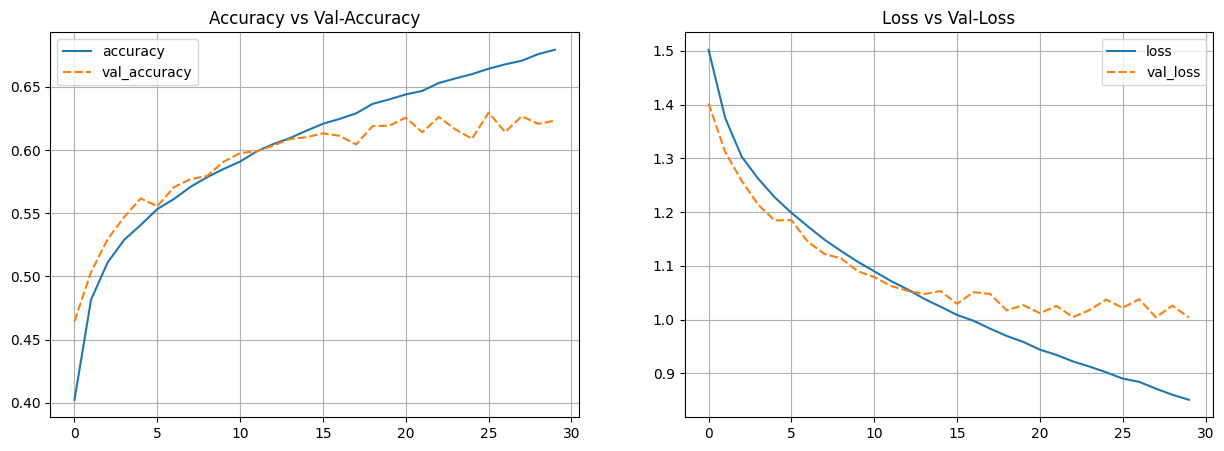

In [71]:
model_lstm_imp_hist_df = pd.DataFrame(model_lstm_hist_imp.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_imp_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_imp_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Terlihat dari hasil model ann menggunakan transfer learning didapat nilai akurasi yang rendah yaitu di sekitaran 65% tetapi modal menunjukkan hasil yang goodfit dan stabil. Model yang stabil ini mungkin dikarenakan banyaknya total parameter yang digunakan dalam melatih model  di mana terdapat 124940934 total parameter. Hingga model mempunyai banyak hal yang dipelajari tetapi tidak maksimal dalam menebak label yang diberikan

In [80]:
y_pred_imp = model_lstm_imp.predict(X_test)
y_pred_imp = np.argmax(y_pred_imp, axis=1)

506/506 [==============================] - 10s 15ms/step


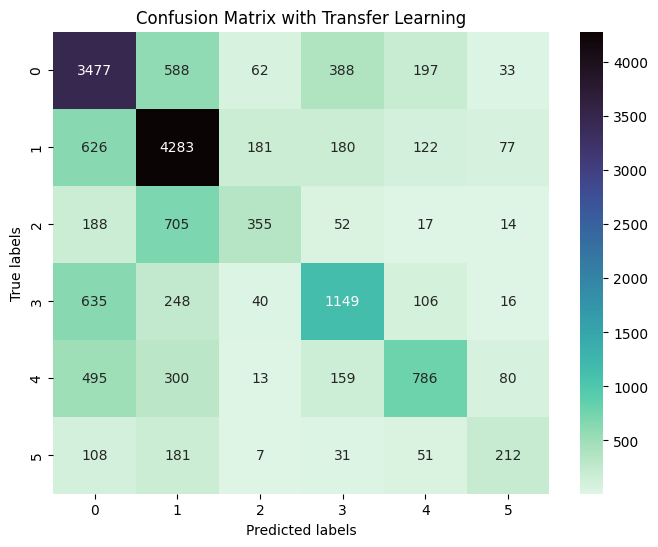

In [81]:
cm1 = confusion_matrix(y_test, y_pred_imp)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='mako_r')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Transfer Learning')
plt.show()

Setelah melakukan prediksi ke dataset uji dilakukan visualisasi berupa confusion matriks untuk melihat bagaimana performa dari model. Didapat bahwa model berhasil memprediksi dengan benar 3477 k kalimat yang bermakna sedih, lalu 4.823 kalimat yang mengandung makna senang, 355 kalimat yang mengandung makna cinta, 1149 kalimat yang mengandung makna marah, 786 kalimat yang mengandung makna takut, dan 212 kalimat yang mengandung makna terkejut. Di mana performa ini masih buruk karena dapat terlihat banyak FP dan FN yang bernilai hingga ratusan

In [82]:
print(classification_report(y_test, y_pred_imp))

              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68      4745
         1.0       0.68      0.78      0.73      5469
         2.0       0.54      0.27      0.36      1331
         3.0       0.59      0.52      0.55      2194
         4.0       0.61      0.43      0.51      1833
         5.0       0.49      0.36      0.41       590

    accuracy                           0.63     16162
   macro avg       0.59      0.52      0.54     16162
weighted avg       0.63      0.63      0.62     16162



Untuk melihat lebih jelas bagaimana performa model dilakukan perhitungan classification report, di mana F1 score tertinggi ada pada model yang menebak kalimat bermakna senang yaitu 0,73.  Lalu kalimat yang mengandung makna sedih berhasil mendapatkan F1 score 0,68 dan untuk label sisanya model mempunyai F1-score yang buruk di bawah 0,6. Dan akurasi total dari model hanya 0,63. Ini menunjukkan bahwa transfer learning membuat modem menjadi lebih stabil tetapi tidak lebih baik dalam memprediksi karena nilai F1-score dari model sangat rendah

### MODEL IMPROVEMENT

In [55]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [56]:
model_lstm = Sequential()

model_lstm.add(text_vectorization)
model_lstm.add(embedding)

model_lstm.add(Bidirectional(LSTM(128,return_sequences=True,kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))

model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(Dropout(0.5))

model_lstm.add(Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm.add(Dropout(0.5))

model_lstm.add(Dense(6, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 48)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 48, 128)           3973376   
                                                                 
 bidirectional (Bidirection  (None, 48, 256)           263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 48, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 256)           0         
                                                        

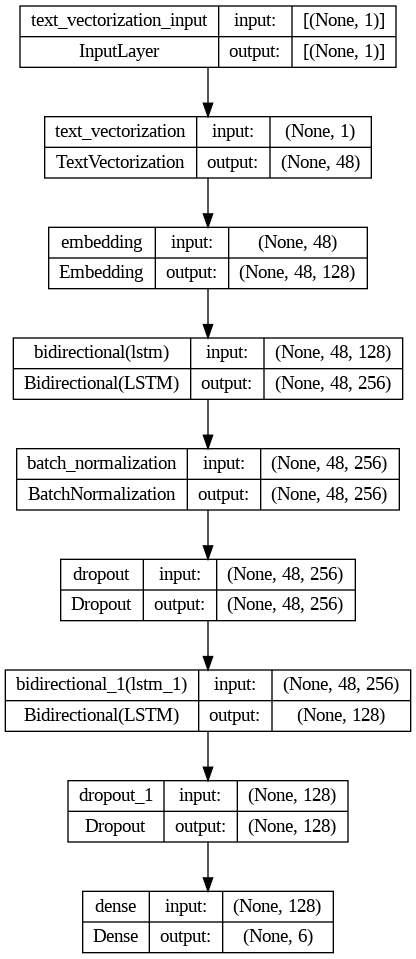

In [57]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

 Selanjutnya akan dibuat sebuah model improvement tanpa transfer learning. menggunakan batch normalization dan embedding sendiri dari hasil model building di atas dengan arsitektur model yang serupa. Di mana terdapat lebih sedikit total parameter dalam training ini yaitu sejumlah 4402694.

In [58]:
model_lstm_hist = model_lstm.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30
2576/2576 [==============================] - 75s 25ms/step - loss: 0.2952 - accuracy: 0.8841 - val_loss: 0.1161 - val_accuracy: 0.9330
Epoch 2/30
2576/2576 [==============================] - 49s 19ms/step - loss: 0.1223 - accuracy: 0.9384 - val_loss: 0.1174 - val_accuracy: 0.9309
Epoch 3/30
2576/2576 [==============================] - 50s 19ms/step - loss: 0.1054 - accuracy: 0.9435 - val_loss: 0.1165 - val_accuracy: 0.9312
Epoch 4/30
2576/2576 [==============================] - 48s 18ms/step - loss: 0.0957 - accuracy: 0.9491 - val_loss: 0.1164 - val_accuracy: 0.9339
Epoch 5/30
2576/2576 [==============================] - 48s 18ms/step - loss: 0.0894 - accuracy: 0.9517 - val_loss: 0.1381 - val_accuracy: 0.9279
Epoch 6/30
2576/2576 [==============================] - 48s 19ms/step - loss: 0.0838 - accuracy: 0.9566 - val_loss: 0.1349 - val_accuracy: 0.9287
Epoch 7/30
2576/2576 [==============================] - 48s 18ms/step - loss: 0.0767 - accuracy: 0.9591 - val_loss: 0.1433 -

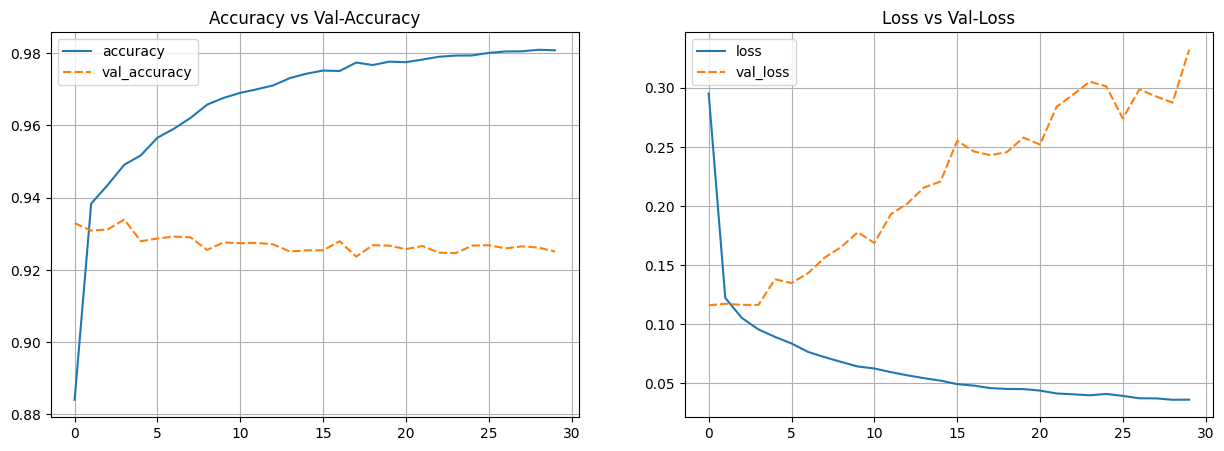

In [59]:
model_lstm_hist_df = pd.DataFrame(model_lstm_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Setelah melihat visualisasi akurasinya didapat bahwa model yang tidak menggunakan transfer learning ini mempunyai akurasi yang sangat bagus yaitu hingga 0,94. Tetapi model ini cenderung overfit dan tidak stabil. Hal ini mungkin dikarenakan kurangnya total parameter yang digunakan untuk model belajar sehingga jika diberi beberapa kata baru di dataset validasi maupun data set uji model tidak dapat mengenalinya dengan baik.

In [63]:
y_pred = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

506/506 [==============================] - 3s 6ms/step


In [64]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako_r')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Jika kita melakukan visualisasi confusion matriks kembali terlihat bahwa model dapat menebak dengan benar 4634  kalimat yang mengandung makna sedih, 5.191 kalimat yang mengandung makna senang, 1090 kalimat yang mengandung makna cinta, 2066 kalimat yang mengandung makna marah, 1598 kalimat yang mengandung makna takut dan 491 kalimat yang mengandung makna. Terlihat bahwa nilai FP dan FN pada confusion matriks di model improvement ini lebih sedikit daripada di model training untuk lebih jelasnya akan dibuat classification report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4745
         1.0       0.95      0.95      0.95      5469
         2.0       0.84      0.82      0.83      1331
         3.0       0.93      0.94      0.94      2194
         4.0       0.90      0.87      0.89      1833
         5.0       0.76      0.83      0.80       590

    accuracy                           0.93     16162
   macro avg       0.89      0.90      0.90     16162
weighted avg       0.93      0.93      0.93     16162



Dari classification report terlihat bahwa F1 score dari model ini jauh lebih tinggi daripada model sebelumnya di mana untuk kelas 0 atau kalimat yang mengandung makna sedih model mempunyai nilai F1 skor 0,97 atau hampir sempurna dan untuk kalimat mengandung makna senang mampu diprediksi model sebesar 0,95. Model juga mempunyai performansi yang hampir sempurna dalam memprediksi kalimat dengan makna marah. Untuk tiga label lainnya diprediksi baik juga oleh model dengan nilai F1-Score di atas 0,8 di mana 20% jauh lebih baik dari model sebelumnya. Karena model ini mempunyai F1 score yang baik walaupun cenderung overfit dilihat dari  visualisasinya. Maka dapat disimpulkan model ini model yang lebih baik dan akan  disimpan dan digunakan untuk model inference

### PENGAMBILAN KESIMPULAN

> Digunakan data set dengan kumpulan pesan Twitter dalam bahasa Inggris yang disertai dengan enam emosi fundamental. Dan digunakan ANN untuk menebak kalimat manakah yang mengandung makna dari keenam label tersebut. Untuk training modelnya dibutuhkan teks yang sudah bersih atau Hanya berupa kalimat tanpa simbol dan beberapa hal lain. Untuk membersihkan teks dilakukan visualisasi kata-kata dalam kalimat menggunakan wordcloud dan didapat beberapa kata dan huruf aneh yang harus dihilangkan dalam tahapan pre processing data.

> Lalu dalam preprocessing data dibuat sebuah fungsi untuk menangani huruf kapital, mention, hashtag, newline, whitespace, URL, penghilangan simbol, penghilangan angka, tokenisasi, lematisasi. Agar teks siap untuk dijadikan bahan pelatihan untuk model

>Dibuat dua model di mana model pertama menggunakan transfer learning. Didapat model yang stabil dan goodfit tetapi mempunyai nilai akurasi yang sangat buruk sejumlah 0,63. Hal ini dikarenakan banyaknya parameter yang dipelajari oleh model sehingga model menjadi lebih stabil tetapi membuat model mempunyai akurasi yang jelek saat memprediksi teks berada dalam label yang mana

>Untuk model kedua tanpa transfer learning dan digunakan Batch normalization dan Embedding dari kata-kata yang ada pada teks. Didapat nilai akurasi yang jauh lebih tinggi sebesar 0,93 tetapi model overfit. Hal ini dikarenakan kurangnya parameter yang digunakan model untuk belajar tapi model lebih baik dalam memprediksi teks berada dalam label yang mana

> Sehingga dapat disimpulkan model tanpa transfer learninglah yang lebih baik dalam memprediksi label dibuktikan dengan nilai F1-score yang tinggi dimana rata-ratanya di atas 0,80. 0,20 lebih baik dari rata-rata model dengan transfer learning

### MODEL SAVING

In [83]:
## FREEZE MODEL
model_lstm.trainable = False
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 48)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 48, 128)           3973376   
                                                                 
 bidirectional (Bidirection  (None, 48, 256)           263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 48, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 256)           0         
                                                        

In [84]:
model_lstm_imp.trainable = False
model_lstm_imp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape_2 (Reshape)         (None, 128, 1)            0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 128, 256)          133120    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128, 256)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [93]:
model_lstm.save('model_lstm_best.keras')